Ziwei Xu 500954406

In [3]:
import psycopg2
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Hypothesis 10: The movie's Meta Score is positively correlated with its box office revenue.

Missing values before filling:
movie_id                   0
worldwide_box_office    6523
metascore                  0
dtype: int64
Missing values after filling:
movie_id                0
worldwide_box_office    0
metascore               0
dtype: int64
   movie_id  worldwide_box_office  metascore
0         2          1.786521e+07         31
1         3          8.408916e+07         68
2         5          4.606086e+07         35
3         6          8.408916e+07         58
4        10          8.408916e+07         49
Correlation between Metascore and Worldwide Box Office: 0.020246262084110886


C:\Users\xuziw\AppData\Local\Temp\ipykernel_15008\2432082539.py:32: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_metascore_boxoffice['worldwide_box_office'].fillna(df_metascore_boxoffice['worldwide_box_office'].mean(), inplace=True)
C:\Users\xuziw\AppData\Local\Temp\ipykernel_15008\2432082539.py:33: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermedi

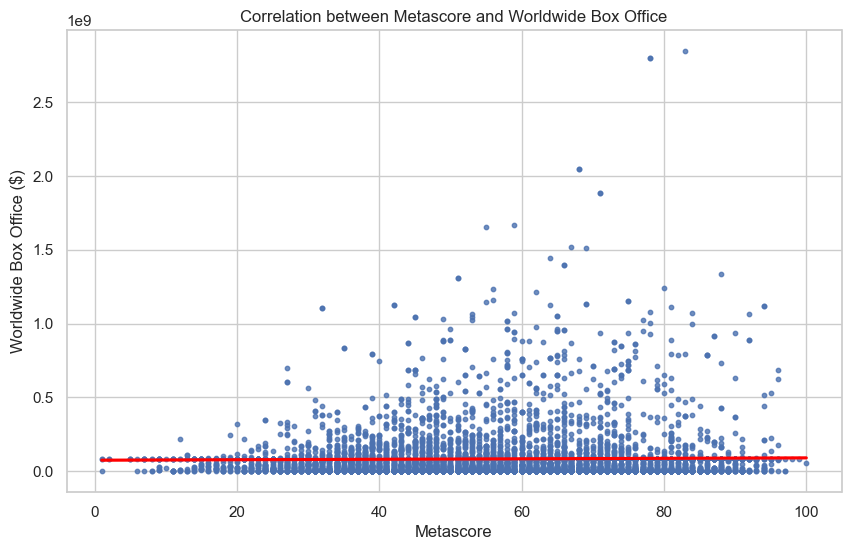

In [5]:
def load_config():
    return {
        'dbname': 'DMGroupAssignment',
        'user': 'postgres',
        'password': '201026',
        'host': 'localhost',
        'port': '5432'
    }

def get_metascore_data():
    config = load_config()
    try:
        with psycopg2.connect(**config) as conn:
            with conn.cursor() as cur:

                query = """
                SELECT 
                    new_movie_table.movie_id,
                    new_movie_table.worldwide_box_office,
                    meta_table.metascore
                FROM new_movie_table
                JOIN meta_table ON new_movie_table.movie_id = meta_table.movie_id
                """
                cur.execute(query)
                
                rows = cur.fetchall()
                df_metascore_boxoffice = pd.DataFrame(rows, columns=['movie_id', 'worldwide_box_office', 'metascore'])

                print("Missing values before filling:")
                print(df_metascore_boxoffice.isna().sum())
            
                df_metascore_boxoffice['worldwide_box_office'].fillna(df_metascore_boxoffice['worldwide_box_office'].mean(), inplace=True)
                df_metascore_boxoffice['metascore'].fillna(df_metascore_boxoffice['metascore'].mean(), inplace=True)

                print("Missing values after filling:")
                print(df_metascore_boxoffice.isna().sum())
                return df_metascore_boxoffice

    except (Exception, psycopg2.DatabaseError) as error:
        print(error)
        return None


def calculate_correlation(df_metascore_boxoffice):
    correlation = df_metascore_boxoffice['worldwide_box_office'].corr(df_metascore_boxoffice['metascore'])
    print(f"Correlation between Metascore and Worldwide Box Office: {correlation}")
    return correlation

def plot_correlation(df_metascore_boxoffice):
    sns.set(style="whitegrid")
    
    plt.figure(figsize=(10, 6))
    sns.regplot(x='metascore', y='worldwide_box_office', data=df_metascore_boxoffice, scatter_kws={'s': 10}, line_kws={"color":"red"})
    
    plt.title('Correlation between Metascore and Worldwide Box Office')
    plt.xlabel('Metascore')
    plt.ylabel('Worldwide Box Office ($)')
    
    plt.show()

if __name__ == '__main__':
    df_metascore_boxoffice = get_metascore_data()
    if df_metascore_boxoffice is not None:
        print(df_metascore_boxoffice.head())  
        
        
        correlation = calculate_correlation(df_metascore_boxoffice)
        
        plot_correlation(df_metascore_boxoffice)

Hypothesis 11: The positive emotion from the critics is positively correlated with the movie’s box office revenue.

Missing values before filling:
movie_id                   0
worldwide_box_office    6165
avg_posemo                 0
dtype: int64
Missing values after filling:
movie_id                0
worldwide_box_office    0
avg_posemo              0
dtype: int64
   movie_id  worldwide_box_office  avg_posemo
0         2          1.786521e+07    4.063448
1         3          7.401672e+07    6.324444
2         5          4.606086e+07    5.250769
3        10          7.401672e+07    2.285000
4        11          2.504406e+07    6.585484
Correlation between Average Posemo and Worldwide Box Office: 0.050586937844850396


C:\Users\xuziw\AppData\Local\Temp\ipykernel_15008\3274788930.py:40: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_posemo_boxoffice['worldwide_box_office'].fillna(df_posemo_boxoffice['worldwide_box_office'].mean(), inplace=True)
C:\Users\xuziw\AppData\Local\Temp\ipykernel_15008\3274788930.py:41: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate ob

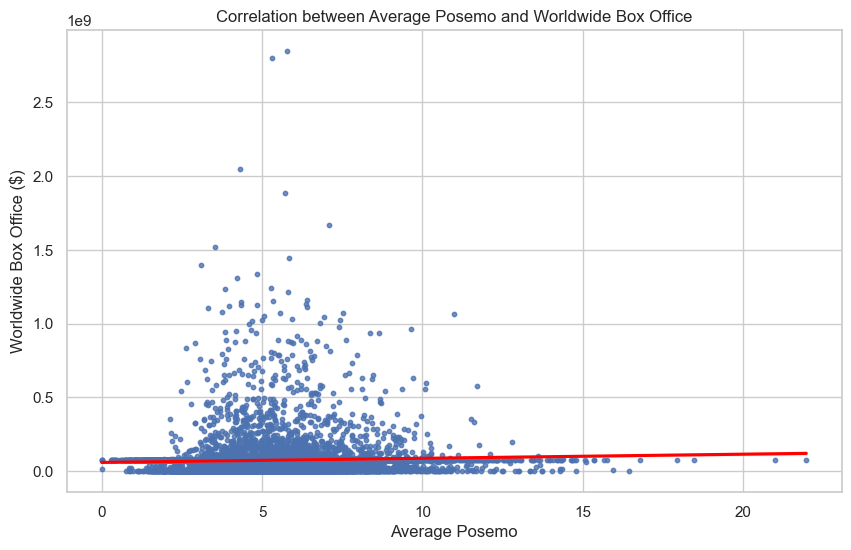

In [6]:
def load_config():
    return {
        'dbname': 'DMGroupAssignment',
        'user': 'postgres',
        'password': '201026',
        'host': 'localhost',
        'port': '5432'
    }

def get_posemo_data():
    config = load_config()
    try:
        with psycopg2.connect(**config) as conn:
            with conn.cursor() as cur:
                query = """
                WITH avg_posemo_by_movie AS (
                    SELECT
                        me.movie_id,
                        AVG(er.posemo) AS avg_posemo
                    FROM movie_expert me
                    JOIN expert_reviews er ON me.expertreview_id = er.expertreview_id
                    GROUP BY me.movie_id
                )
                
                SELECT
                    nmt.movie_id,
                    nmt.worldwide_box_office,
                    apm.avg_posemo
                FROM new_movie_table nmt
                JOIN avg_posemo_by_movie apm ON nmt.movie_id = apm.movie_id
                """
                cur.execute(query)
                
                rows = cur.fetchall()
                df_posemo_boxoffice = pd.DataFrame(rows, columns=['movie_id', 'worldwide_box_office', 'avg_posemo'])
            
                print("Missing values before filling:")
                print(df_posemo_boxoffice.isna().sum())
            
                df_posemo_boxoffice['worldwide_box_office'].fillna(df_posemo_boxoffice['worldwide_box_office'].mean(), inplace=True)
                df_posemo_boxoffice['avg_posemo'].fillna(df_posemo_boxoffice['avg_posemo'].mean(), inplace=True)

                print("Missing values after filling:")
                print(df_posemo_boxoffice.isna().sum())
                return df_posemo_boxoffice

    except (Exception, psycopg2.DatabaseError) as error:
        print(error)
        return None

def calculate_correlation(df_posemo_boxoffice):
    correlation = df_posemo_boxoffice['worldwide_box_office'].corr(df_posemo_boxoffice['avg_posemo'])
    print(f"Correlation between Average Posemo and Worldwide Box Office: {correlation}")
    return correlation

def plot_correlation(df_posemo_boxoffice):
    sns.set(style="whitegrid")
    
    plt.figure(figsize=(10, 6))
    sns.regplot(x='avg_posemo', y='worldwide_box_office', data=df_posemo_boxoffice, scatter_kws={'s': 10}, line_kws={"color":"red"})
    
    plt.title('Correlation between Average Posemo and Worldwide Box Office')
    plt.xlabel('Average Posemo')
    plt.ylabel('Worldwide Box Office ($)')
    
    plt.show()

if __name__ == '__main__':
    df_posemo_boxoffice = get_posemo_data()
    if df_posemo_boxoffice is not None:
        print(df_posemo_boxoffice.head())  # 打印前几行数据
        
        correlation = calculate_correlation(df_posemo_boxoffice)
        
        plot_correlation(df_posemo_boxoffice)

Hypothesis 12: The negative emotion from the critics is negatively correlated with the sales of movies.

Missing values before filling:
movie_id                   0
worldwide_box_office    6165
avg_negemo                 0
dtype: int64
Missing values after filling:
movie_id                0
worldwide_box_office    0
avg_negemo              0
dtype: int64
   movie_id  worldwide_box_office  avg_negemo
0         2          1.786521e+07    2.462069
1         3          7.401672e+07    3.827778
2         5          4.606086e+07    0.720385
3        10          7.401672e+07    2.959000
4        11          2.504406e+07    2.797097
Correlation between Average Negemo and Worldwide Box Office: -0.04146266386787506


C:\Users\xuziw\AppData\Local\Temp\ipykernel_15008\2439405851.py:40: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_negemo_boxoffice['worldwide_box_office'].fillna(df_negemo_boxoffice['worldwide_box_office'].mean(), inplace=True)
C:\Users\xuziw\AppData\Local\Temp\ipykernel_15008\2439405851.py:41: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate ob

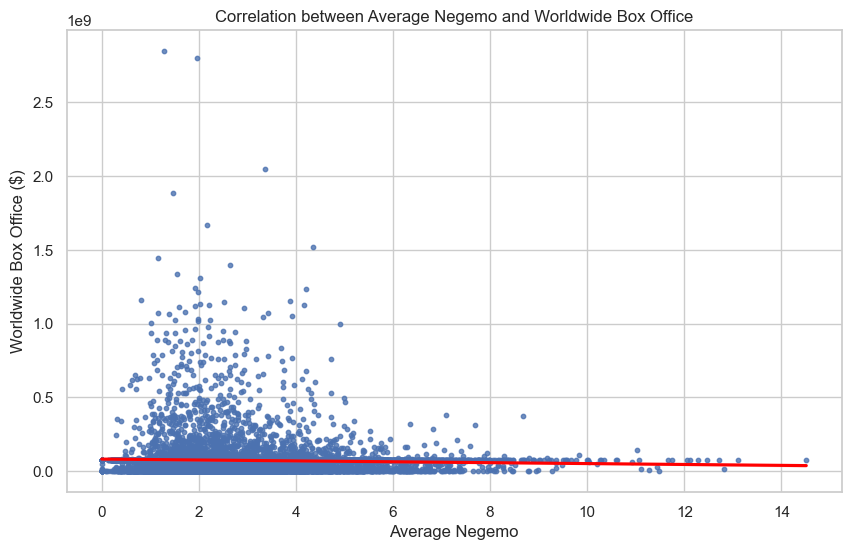

In [7]:
def load_config():
    return {
        'dbname': 'DMG_IndividualTest',
        'user': 'postgres',
        'password': '201026',
        'host': 'localhost',
        'port': '5432'
    }

def get_negemo_data():
    config = load_config()
    try:
        with psycopg2.connect(**config) as conn:
            with conn.cursor() as cur:
                query = """
                WITH avg_negemo_by_movie AS (
                    SELECT
                        me.movie_id,
                        AVG(er.negemo) AS avg_negemo
                    FROM movie_expert me
                    JOIN expert_reviews er ON me.expertreview_id = er.expertreview_id
                    GROUP BY me.movie_id
                )
                
                SELECT
                    nmt.movie_id,
                    nmt.worldwide_box_office,
                    anm.avg_negemo
                FROM new_movie_table nmt
                JOIN avg_negemo_by_movie anm ON nmt.movie_id = anm.movie_id
                """
                cur.execute(query)
                
                rows = cur.fetchall()
                df_negemo_boxoffice = pd.DataFrame(rows, columns=['movie_id', 'worldwide_box_office', 'avg_negemo'])
            
                print("Missing values before filling:")
                print(df_negemo_boxoffice.isna().sum())
            
                df_negemo_boxoffice['worldwide_box_office'].fillna(df_negemo_boxoffice['worldwide_box_office'].mean(), inplace=True)
                df_negemo_boxoffice['avg_negemo'].fillna(df_negemo_boxoffice['avg_negemo'].mean(), inplace=True)

                print("Missing values after filling:")
                print(df_negemo_boxoffice.isna().sum())
                return df_negemo_boxoffice

    except (Exception, psycopg2.DatabaseError) as error:
        print(error)
        return None

def calculate_correlation(df_negemo_boxoffice):
    correlation = df_negemo_boxoffice['worldwide_box_office'].corr(df_negemo_boxoffice['avg_negemo'])
    print(f"Correlation between Average Negemo and Worldwide Box Office: {correlation}")
    return correlation

def plot_correlation(df_negemo_boxoffice):
    sns.set(style="whitegrid")
    
    plt.figure(figsize=(10, 6))
    sns.regplot(x='avg_negemo', y='worldwide_box_office', data=df_negemo_boxoffice, scatter_kws={'s': 10}, line_kws={"color":"red"})
    
    plt.title('Correlation between Average Negemo and Worldwide Box Office')
    plt.xlabel('Average Negemo')
    plt.ylabel('Worldwide Box Office ($)')
    
    plt.show()

if __name__ == '__main__':
    df_negemo_boxoffice = get_negemo_data()
    if df_negemo_boxoffice is not None:
        print(df_negemo_boxoffice.head()) 
        
        correlation = calculate_correlation(df_negemo_boxoffice)
        
        plot_correlation(df_negemo_boxoffice)